# I/ Recurrent Neural Networks (RNN)







## Introduction

A recurrent neural network has the structure of multiple feedforward neural networks with connections among their hidden units. Each layer on the RNN represents a distinct time step and the weights are shared across time.

The combined feedfoward neural networks work over time to compute parts of the output one at a time sequentially.

Connections among the hidden units allow the model to iteratively build a relevant summary of past observations hence capturing dependencies between events that are several steps apart in the data.

An illustration of the RNN model is given below:
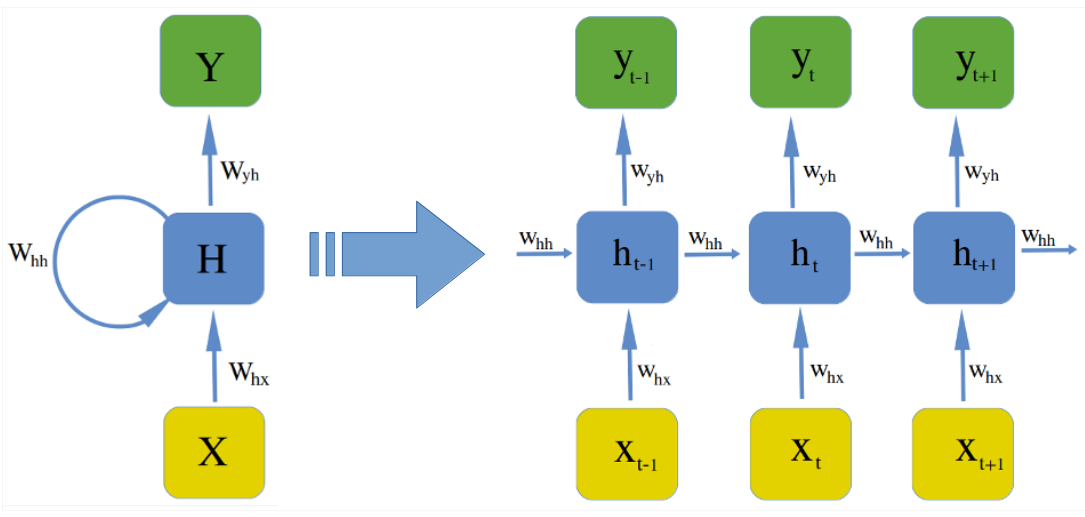

For each element in the input sequence, each layer computes the following function:
      $$h_t = \tanh(W_{hx} x_t  + W_{hh} h_{(t-1)} + b_{hh})$$

  where :$h_t$ is the hidden state at time $t$, $x_t$ is
  the input at time $t$, and $h_{(t-1)}$ is the hidden state of the
  previous layer at time $t-1$ or the initial hidden state at time $0$.
  If $nonlinearity$ is $'relu'$, then $\text{ReLU}$ is used instead of $\tanh$.

 RNN has one shortcoming, though. Simple RNNs can connect previous information to the current one, where the temporal gap between the relevant past information and the current one is small. As that gap grows, RNNs become less capable of learning the long-term dependencies, also known as **the vanishing gradient problem**. This is where LSTM comes for help.



## The vanishing gradient


The vanishing gradient problem describes a situation encountered in the training of neural networks where the gradients used to update the weights shrink exponentially. As a consequence, the weights are not updated anymore, and learning stalls.

## The exploding gradient

The exploding gradient problem describes a situation in the training of neural networks where the gradients used to update the weights grow exponentially. This prevents the backpropagation algorithm from making reasonable updates to the weights, and learning becomes unstable.

 For more on **The Vanishing/Exploding Gradient problem** , go [here](https://www.jefkine.com/general/2018/05/21/2018-05-21-vanishing-and-exploding-gradient-problems/)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from keras.layers import Dense,SimpleRNN
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt

In [ ]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500


In [ ]:
import numpy as np
import pandas as pd
df=pd.DataFrame(X)
df['Output']=y
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Output
0,0.583727,0.785936,-0.171872,0.669287,1.671810,0.598318,1.498076,0.279251,-0.317058,-0.419613,-0.217961,0.811867,-0.792153,0.566210,0.974736,-0.822374,1.030072,-0.679455,-0.215406,1.031189,283.438265
1,1.836535,-0.439753,1.210371,1.495413,1.166660,-0.695817,-1.013652,-0.783010,0.740936,0.848620,1.293971,1.377905,1.141645,0.984230,-0.084615,-1.258028,1.138478,-0.619851,0.034862,0.252769,103.364982
2,-0.116182,0.338823,-1.832381,0.849131,-1.001240,-0.207779,-1.016756,-0.095361,-0.735512,0.684862,-0.641591,-0.472694,-0.565611,0.533560,-1.063517,-0.367900,-1.398943,0.405313,-0.171244,0.633441,-182.491592
3,-0.108010,-0.404769,-0.107993,-1.146575,-0.692175,0.567931,0.423871,-0.762185,-1.216825,-0.168903,0.103165,-1.376652,-0.839116,0.739115,-0.584282,0.287434,1.451720,0.464322,1.279857,1.070726,148.539632
4,-1.933846,0.785996,0.237308,-0.245901,0.878658,-2.166559,0.287565,1.147085,1.037847,0.104104,-1.117821,-0.915913,-0.988966,-0.552877,1.325872,2.537089,1.114503,-0.001376,-1.677632,-0.470153,-68.316572


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Output
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.051946,0.026348,0.009081,0.033098,0.055827,0.016372,-0.032344,-0.024945,-0.015319,-0.056084,0.012404,0.108170,0.007783,0.000649,0.009675,0.001891,0.078827,0.046006,-0.008132,-0.025278,3.156432
std,0.985777,0.999948,1.005182,0.968213,0.978702,1.029161,1.018290,1.000598,1.018700,0.981909,1.013300,0.972542,1.047265,1.016334,0.999217,1.000748,1.001402,0.949042,0.992944,1.009519,152.756648
min,-3.280328,-3.173462,-2.593950,-3.038443,-2.854054,-3.294858,-3.219132,-2.928240,-3.026057,-3.451403,-2.886694,-3.310843,-3.259206,-3.656440,-3.053764,-3.260615,-3.029344,-2.802132,-2.857528,-3.165210,-436.177417
25%,-0.728922,-0.612811,-0.621980,-0.656889,-0.620949,-0.650651,-0.680829,-0.714177,-0.717228,-0.709866,-0.684175,-0.555532,-0.729966,-0.748177,-0.641885,-0.664577,-0.601430,-0.609191,-0.670491,-0.696836,-100.632983
50%,-0.046177,0.029501,0.014929,0.047522,0.029781,0.032963,-0.035574,-0.075798,-0.036503,-0.109330,0.009456,0.140186,-0.012277,0.045931,-0.006801,0.041527,0.112755,0.049471,-0.029780,-0.000059,-0.240226
75%,0.608848,0.700829,0.651087,0.679880,0.657816,0.707084,0.617424,0.685876,0.674337,0.585775,0.714692,0.793501,0.701495,0.744313,0.651159,0.661980,0.749400,0.737972,0.655990,0.662391,110.856293
max,3.958603,2.717386,2.839148,2.843572,4.168118,3.238343,2.975525,3.106749,3.118480,4.026849,3.432663,3.077079,3.560873,2.857734,3.446956,2.854424,3.834381,2.890808,3.398116,3.135047,575.304889


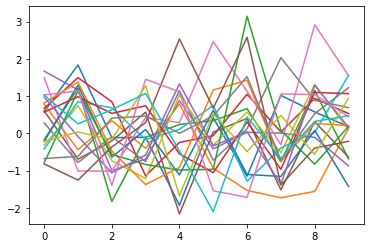

In [ ]:
plt.plot(X[0:10])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
# define model
model = Sequential()
model.add(SimpleRNN(25, input_dim=20, activation='relu'))
model.add(Dense(1, activation='linear'))

Finally, we'll reshape X_train and X_test to fit with the Keras model. RNNs model requires three-dimensional input data. 

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
# fit model
mse = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
print(mse)
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train_mse: %.3f, Test_mse: %.3f' % (train_mse, test_mse))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/100
25/25 [==============================] - 3s 19ms/step - loss: nan - val_loss: nan
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 11/100
25/25 [==============================] - 0s 5ms/step - 

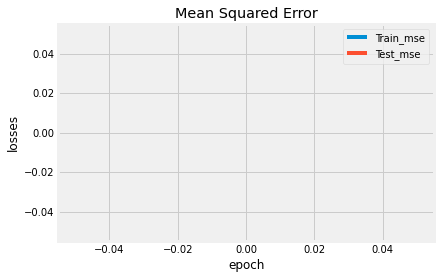

In [ ]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(mse.history['loss'], label='train')
plt.plot(mse.history['val_loss'], label='test')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train_mse','Test_mse'])
plt.show()

This demonstrates that some intervention is required with regard to the target variable for the model to learn this problem.

A line plot of training history is created but does not show anything as the model almost immediately results in a NaN mean squared error.

## Gradient Clipping

**Gradient clipping** involves capping the error derivatives before propagating them back through the network. The capped gradients are used to update the weights hence resulting in smaller weights. The gradients are capped by scaling and clipping. Gradient clipping involves forcing the gradients to a certain number when they go above or below a defined threshold. 

**Types of Clipping techniques**


Gradient clipping can be applied in two common ways:

*   Clipping by value
*   Clipping by norm

Let’s look at the differences between the two.

### **Gradient Clipping-by-norm**

Clipping the gradient by norm ensures that the gradient of every weight is clipped such that its norm won’t be above the specified value.  

We can update the training of the model in the previous section to add gradient norm scaling.

This can be implemented by setting the `clipnorm` argument on the optimizer.

For example, the gradients can be rescaled to have a vector norm (magnitude or length) of 1.0, as follows:



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
# define model
model = Sequential()
model.add(SimpleRNN(25, input_dim=20, activation='relu'))
model.add(Dense(1, activation='linear'))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
# define model
model = Sequential()
model.add(SimpleRNN(25, input_dim=20, activation='relu'))
model.add(Dense(1, activation='linear'))
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# compile model
opt_norm = SGD(lr=0.01, momentum=0.9, clipnorm=1)
model.compile(loss='mean_squared_error', optimizer=opt_norm)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:

# compile model
model.compile(loss='mean_squared_error', optimizer=opt_norm)
# fit model
mse = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
print(mse)
# evaluate the model
train_mse = model.evaluate(X_train, y_train)
test_mse = model.evaluate(X_test, y_test)
print('Train_mse: %.3f, Test_mse: %.3f' % (train_mse, test_mse))


Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 23879.8125 - val_loss: 19246.6270
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 22243.2383 - val_loss: 17072.2148
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 18628.3770 - val_loss: 13242.1904
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 13286.5703 - val_loss: 8591.1396
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 7689.3462 - val_loss: 4061.6179
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 2770.0872 - val_loss: 954.9162
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 541.3741 - val_loss: 241.0831
Epoch 8/100
25/25 [==============================] - 0s 11ms/step - loss: 258.2083 - val_loss: 159.4011
Epoch 9/100
25/25 [==============================] - 0s 12ms/step - loss: 188.6426 - val_loss: 95.2574
Epoch 10/100
25/25 [==============================] -

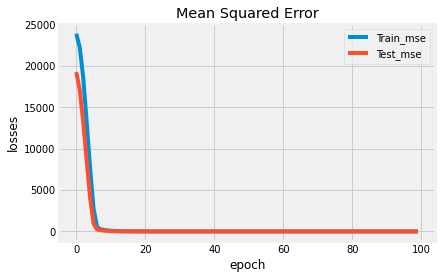

In [ ]:
plt.title('Mean Squared Error')
plt.plot(mse.history['loss'], label='train')
plt.plot(mse.history['val_loss'], label='test')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train_mse','Test_mse'])
plt.show()

A line plot is also created showing the means squared error loss on the train and test datasets over training epochs.

The plot shows how loss dropped from large values above 20,000 down to small values below 100 rapidly over 10 epochs.



### **Gradient Clipping-by-value**

Clipping the gradient by value involves defining a minimum and a maximum threshold. If the gradient goes above the maximum value it is capped to the defined maximum. Similarly, if the gradient goes below the minimum it is capped to the stated minimum value. 

Another solution to the exploding gradient problem is to clip the gradient if it becomes too large or too small.

We can update the training of the RNNs to use gradient clipping by 
adding the `clipvalue` argument to the optimization algorithm configuration. 

For example, the code below clips the gradient to the range [-0.8 to 0.8
].

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
# define model
model = Sequential()
model.add(SimpleRNN(25, input_dim=20, activation='relu'))
model.add(Dense(1, activation='linear'))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
# define model
model = Sequential()
model.add(SimpleRNN(25, input_dim=20, activation='relu'))
model.add(Dense(1, activation='linear'))
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# compile model
opt_value = SGD(lr=0.01, momentum=0.9, clipvalue=0.8)
model.compile(loss='mean_squared_error', optimizer=opt_value)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
# compile model
model.compile(loss='mean_squared_error', optimizer=opt_value)
# fit model
mse = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
print(mse)
# evaluate the model
train_mse = model.evaluate(X_train, y_train)
test_mse = model.evaluate(X_test, y_test)
print('Train_mse: %.3f, Test_mse: %.3f' % (train_mse, test_mse))


Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 19932.3105 - val_loss: 11950.1797
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 3083.8657 - val_loss: 1061.2067
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 462.6205 - val_loss: 245.4318
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 177.4109 - val_loss: 141.1363
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 108.7073 - val_loss: 77.2169
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 48.9833 - val_loss: 59.8595
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 37.0740 - val_loss: 38.8211
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 32.5899 - val_loss: 53.6526
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 29.4965 - val_loss: 38.6900
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 3

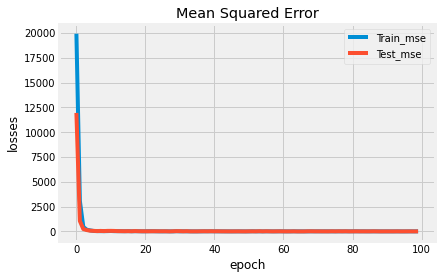

In [ ]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(mse.history['loss'], label='train')
plt.plot(mse.history['val_loss'], label='test')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train_mse','Test_mse'])
plt.show()

A line plot is also created showing the means squared error loss on the train and test datasets over training epochs.

The plot shows how loss dropped from large values above 20,000 down to small values below 100 rapidly over 5 epochs.

- Gradient clipping by norm got better result than Gradient clipping by value.
- Gradient clipping by norm needs more epochs to drop from large values to below 100 than Gradient clipping by value.  

## Different RNN Architecture

### Long Short Term Memory (LSTM)

Long short-term memory (LSTM) is a deep learning system that avoids the vanishing gradient problem. LSTM is normally augmented by recurrent gates called **“forget gates”**. LSTM prevents backpropagated errors from vanishing or exploding. Instead, errors can flow backwards through unlimited numbers of virtual layers unfolded in space. That is, LSTM can learn tasks that require memories of events that happened thousands or even millions of discrete time steps earlier. Problem-specific LSTM-like topologies can be evolved. LSTM works even given long delays between significant events and can handle signals that mix low and high frequency components.

LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

An illustration of the LSTM model is given below:

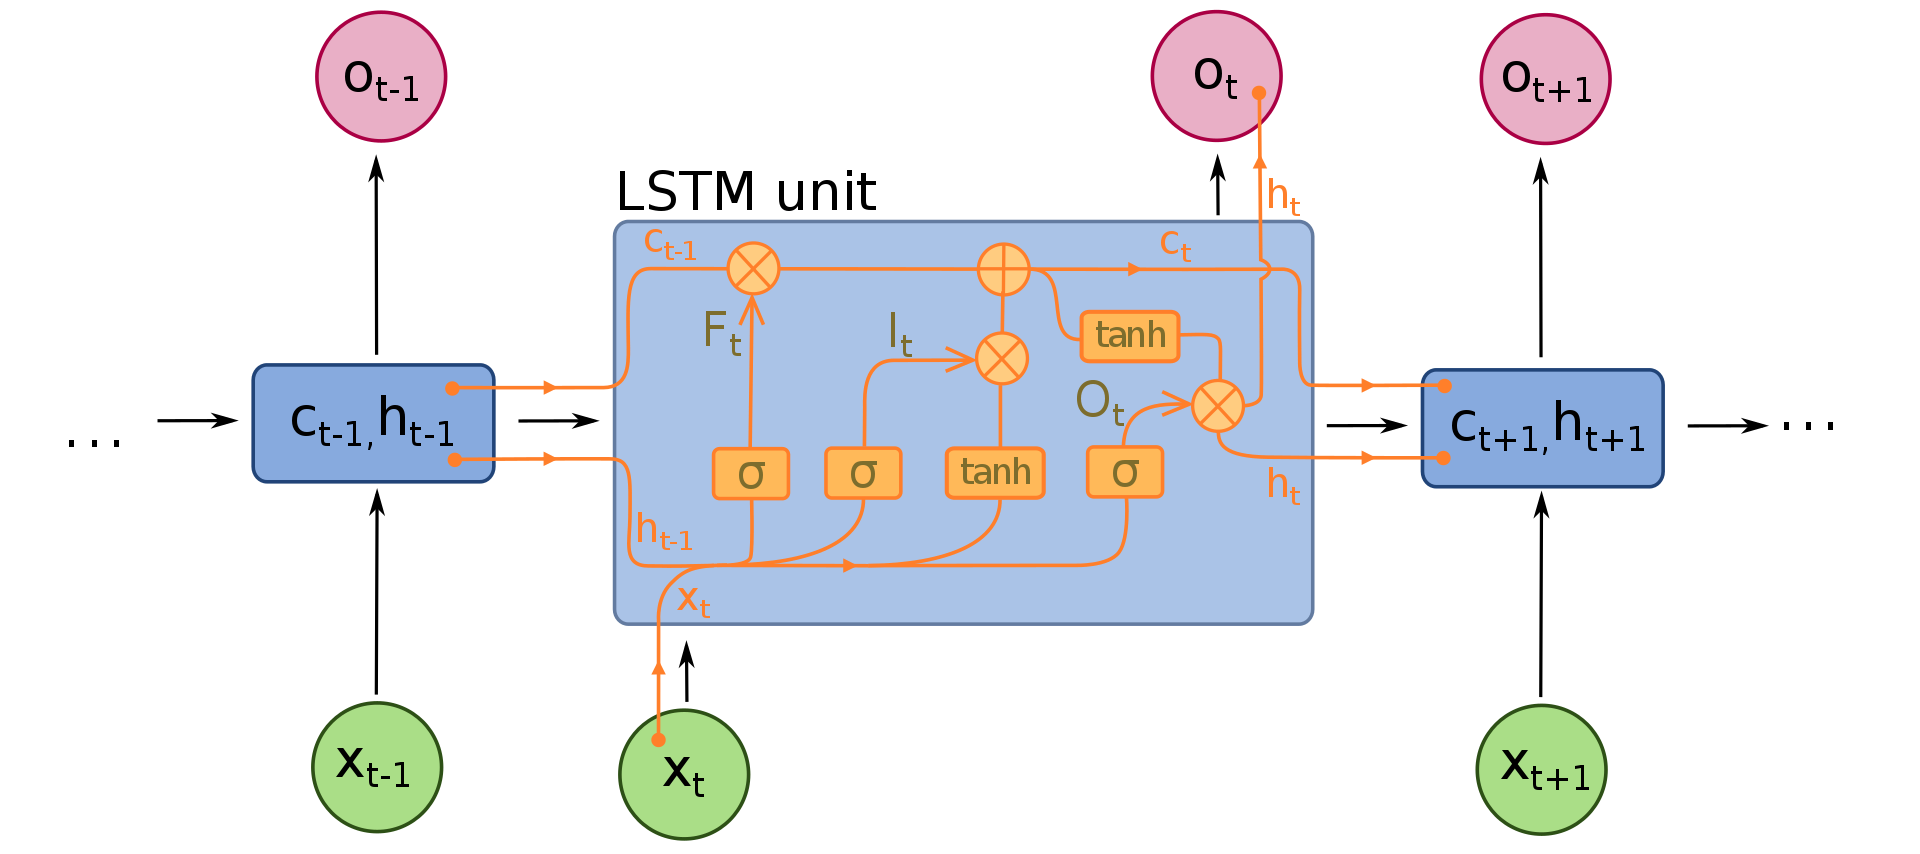

Applies a multi-layer long short-term memory (LSTM) RNN to an input sequence.

For each element in the input sequence, each layer computes the following function:
\begin{array}{ll} \\i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{t-1} + b_{hi}) \\
            f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{t-1} + b_{hf}) \\
            g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{t-1} + b_{hg}) \\
            o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{t-1} + b_{ho}) \\
            c_t = f_t \odot c_{t-1} + i_t \odot g_t \\
            h_t = o_t \odot \tanh(c_t) \\
        \end{array}
  where : $h_t$ is the hidden state at time $t$, $c_t$ is the cell state at time $t$, $x_t$ is the input at time $t$, $h_{t-1}$
  is the hidden state of the layer at time $t-1$ or the initial hidden
  state at time $0$, and $i_t$, $f_t$, $g_t$,
  $o_t$ are the input, forget, cell, and output gates, respectively.
  $\sigma$ is the sigmoid function, and $\odot$ is the Hadamard product.


### Gated Reccurrent Unit (GRU)

Gated Recurrent Units (GRU) is a slightly more streamlined variant that provides comparable performance and considerably faster computation. Like LSTMs, they also capture long-term dependencies, but they do so using reset and update gates without any cell state.

While the update gate determines how much of the past information needs to be kept, the reset gate decides how much of the past information to forget. Doing fewer tensor operations, GRUs are often faster and require less memory than LSTMs. As you see below, its model class is almost identical to the RNN's

An illustration of the GRU model is given below:

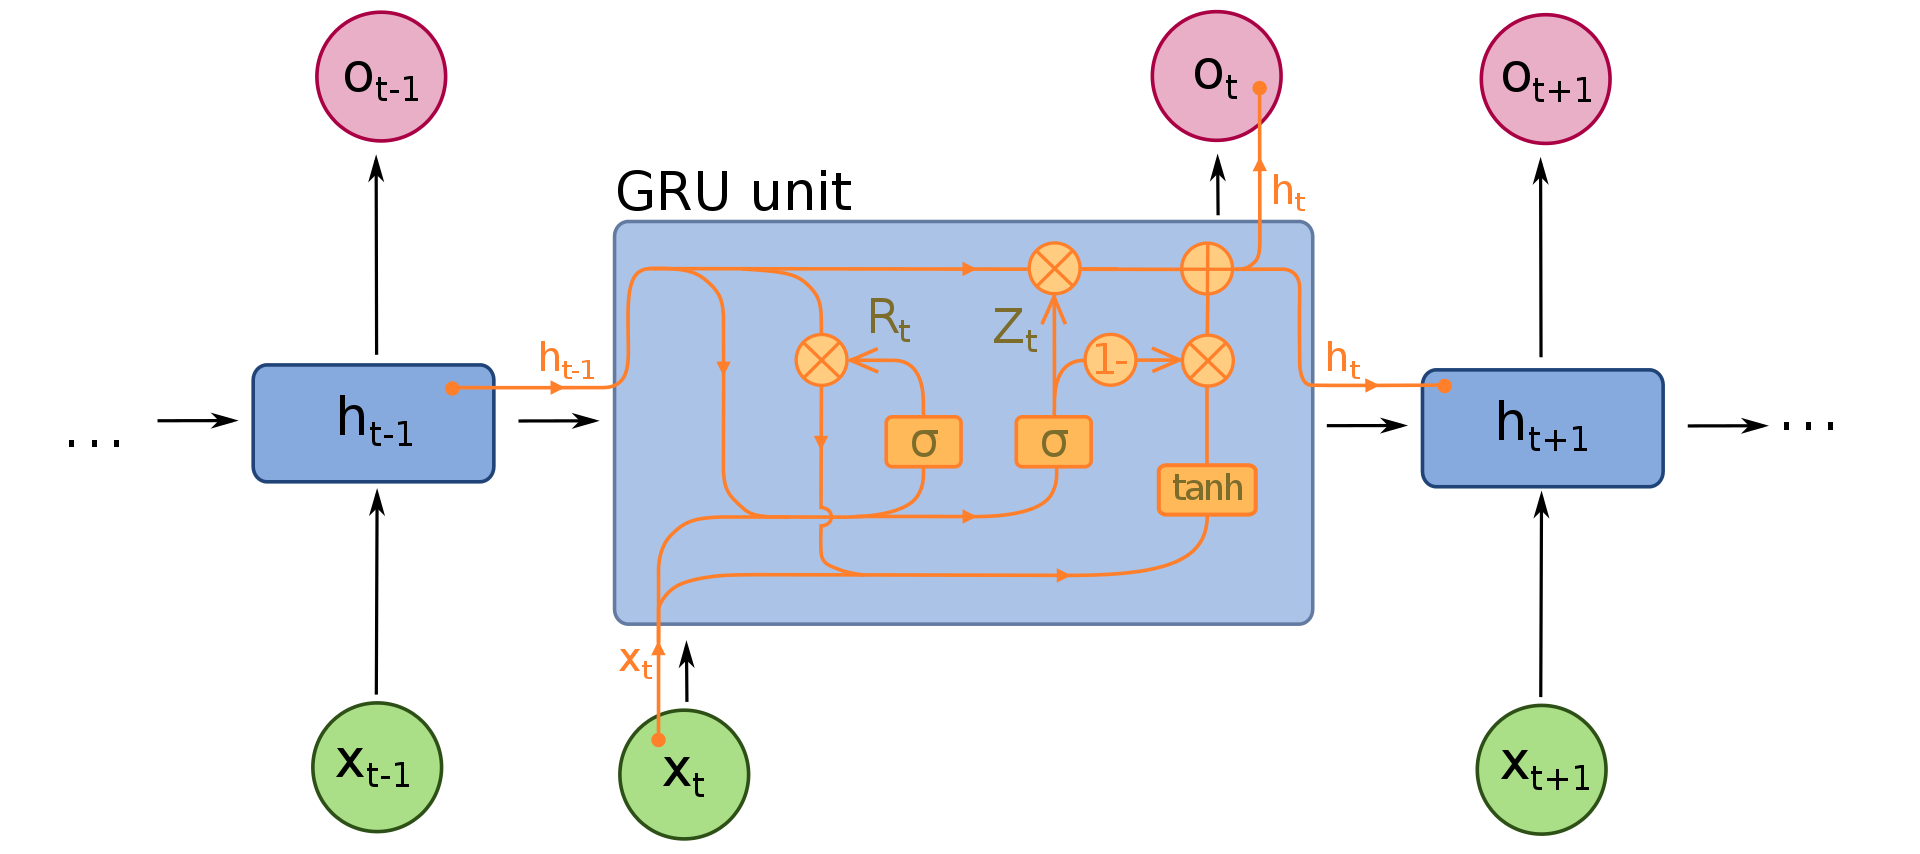

Applies a multi-layer gated recurrent unit (GRU) RNN to an input sequence.

For each element in the input sequence, each layer computes the following function:
\begin{array}{ll}
        r = \sigma(W_{ir} x + b_{ir} + W_{hr} h + b_{hr}) \\
        z = \sigma(W_{iz} x + b_{iz} + W_{hz} h + b_{hz}) \\
        n = \tanh(W_{in} x + b_{in} + r * (W_{hn} h + b_{hn})) \\
        h' = (1 - z) * n + z * h
        \end{array}

where : $\sigma$ is the sigmoid function, and $*$ is the Hadamard product.

### Bidirectional recurrent neural networks (BRNN)

The concept behind a bidirectional RNN is simple. As well as having an RNN processing the words in the sentence from the first to the last (a forward RNN), we have a second RNN processing the words in the sentence from the last to the first (a backward RNN). At time step t, the forward RNN is processing word $x_t$, and the backward RNN is processing word $x_{T−t+1}$.

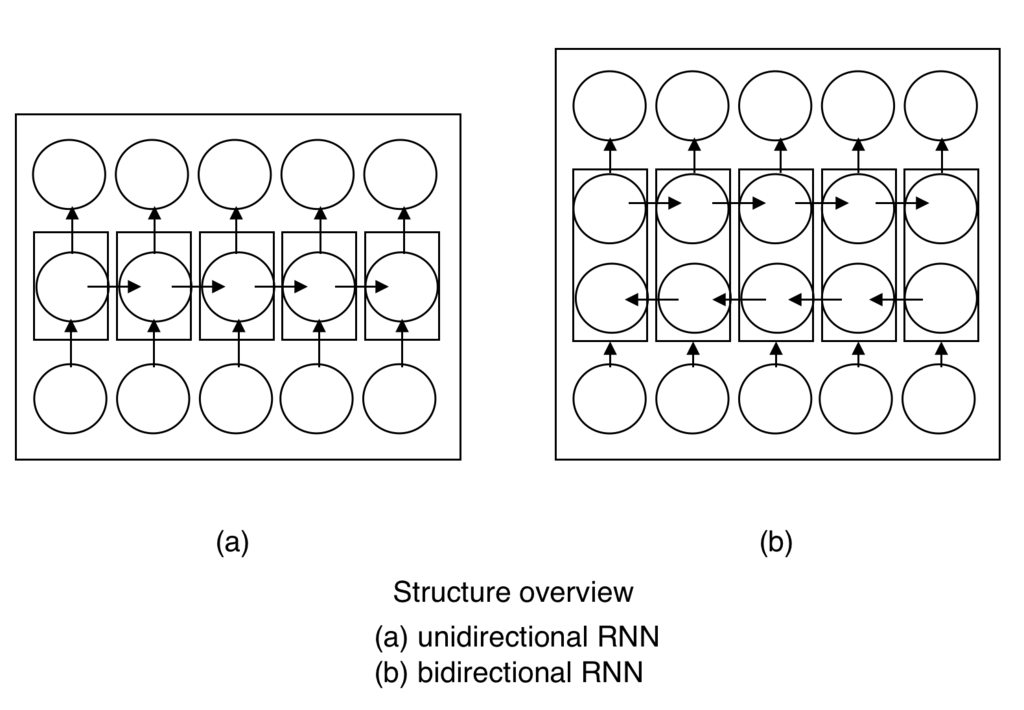

# II/ Prediction stock price
Prediction the price of stocks of IBM for the year 2017

Dataset: [DJIA 30 Stock Time Series](https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Prepare the data

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import datetime as dt

In [ ]:
# Some functions to help out with
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    return rmse
def return_r2_score(test,predicted):
    return r2_score(test,predicted)

In [5]:
# First, we get the data
dataset = pd.read_csv('/content/drive/MyDrive/data/stock/stock/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [ ]:
print('Sum of NaN in dataset:')
dataset.isna().sum()

Sum of NaN in dataset:


Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [9]:
dataset=dataset.dropna()

In [10]:
dataset.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,145.515545,146.682319,144.471597,145.617592,5.773770e+06
std,37.554946,37.619664,37.477641,37.535600,3.193255e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.750000,115.490000,116.520000,3.622178e+06
50%,149.610000,150.410000,148.470000,149.330000,4.931203e+06
75%,178.445000,179.775000,177.330000,178.690000,6.966642e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


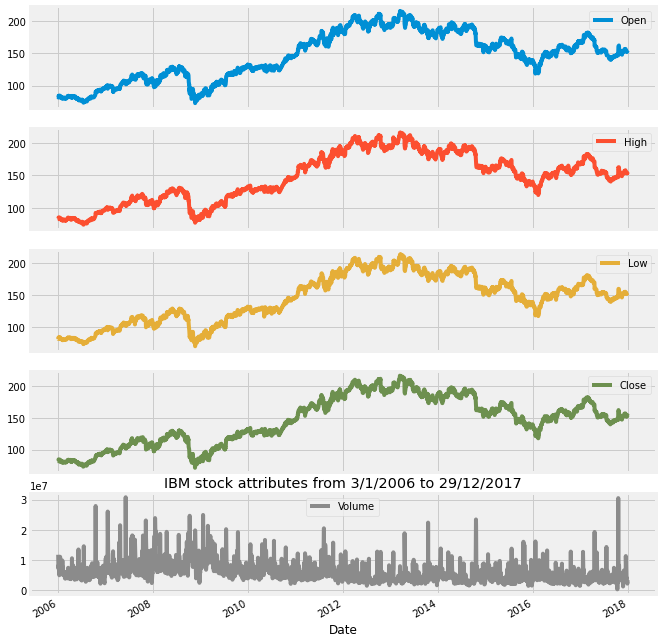

In [7]:
dataset['2006':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('IBM stock attributes from 3/1/2006 to 29/12/2017')
plt.savefig('stocks.png')
plt.show()

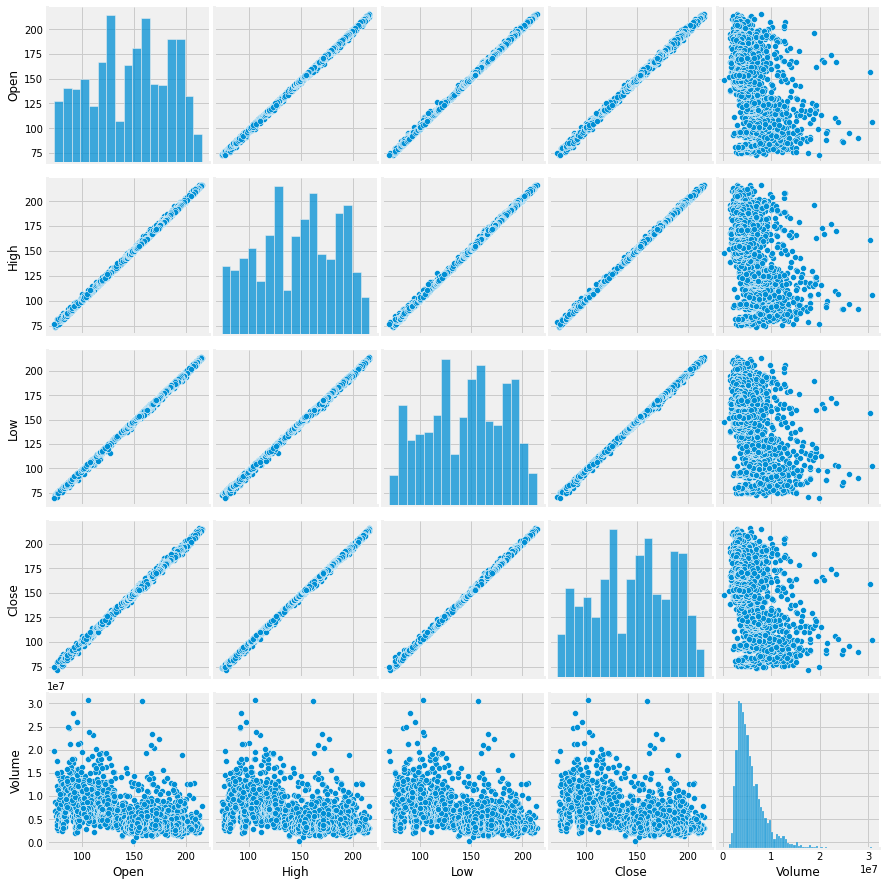

In [ ]:
sns.pairplot(dataset,diag_kind="hist")

In [18]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

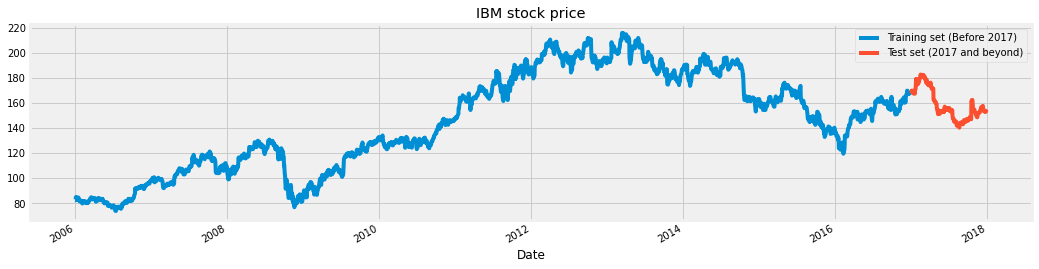

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [19]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Simple RNN


In [ ]:
regressor = Sequential()
# First SimpleRNN layer 
regressor.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# Second SimpleRNN layer 
regressor.add(SimpleRNN(units=50, return_sequences=True))
# Third SimpleRNN layer 
regressor.add(SimpleRNN(units=50, return_sequences=True))
# Fourth SimpleRNN layer 
regressor.add(SimpleRNN(units=50))
# The output layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 26s 272ms/step - loss: 0.0808
Epoch 2/50
85/85 [==============================] - 27s 323ms/step - loss: 0.0286
Epoch 3/50
85/85 [==============================] - 23s 272ms/step - loss: 0.0198
Epoch 4/50
85/85 [==============================] - 23s 273ms/step - loss: 0.0125
Epoch 5/50
85/85 [==============================] - 25s 292ms/step - loss: 0.0103
Epoch 6/50
85/85 [==============================] - 23s 277ms/step - loss: 0.0085
Epoch 7/50
85/85 [==============================] - 23s 264ms/step - loss: 0.0082
Epoch 8/50
85/85 [==============================] - 23s 269ms/step - loss: 0.0061
Epoch 9/50
85/85 [==============================] - 23s 271ms/step - loss: 0.0058
Epoch 10/50
85/85 [==============================] - 23s 270ms/step - loss: 0.0046
Epoch 11/50
85/85 [==============================] - 23s 271ms/step - loss: 0.0047
Epoch 12/50
85/85 [==============================] - 23s 271ms/step - loss: 0.0040
Epoch 13/50
8

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
SimpleRNN_predicted_stock_price = regressor.predict(X_test)
SimpleRNN_predicted_stock_price = sc.inverse_transform(SimpleRNN_predicted_stock_price)

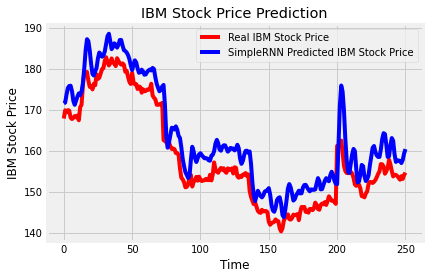

In [ ]:
plt.plot(test_set, color='red',label='Real IBM Stock Price')
plt.plot(SimpleRNN_predicted_stock_price, color='blue',label='SimpleRNN Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [ ]:
print('The root mean squared error is', return_rmse(test_set,SimpleRNN_predicted_stock_price))

The root mean squared error is 5.4623733148911855.


In [ ]:
print('r2 score:',r2_score(test_set,SimpleRNN_predicted_stock_price))

r2 score: 0.7982536812880507


## Long Short Term Memory (LSTM)

In [ ]:
# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 13s 64ms/step - loss: 0.0240
Epoch 2/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0099
Epoch 3/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0086
Epoch 4/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0068
Epoch 5/50
85/85 [==============================] - 5s 64ms/step - loss: 0.0057
Epoch 6/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0050
Epoch 7/50
85/85 [==============================] - 5s 64ms/step - loss: 0.0047
Epoch 8/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0042
Epoch 9/50
85/85 [==============================] - 5s 64ms/step - loss: 0.0039
Epoch 10/50
85/85 [==============================] - 5s 64ms/step - loss: 0.0039
Epoch 11/50
85/85 [==============================] - 5s 64ms/step - loss: 0.0035
Epoch 12/50
85/85 [==============================] - 5s 64ms/step - loss: 0.0033
Epoch 13/50
85/85 [=================

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price =regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)

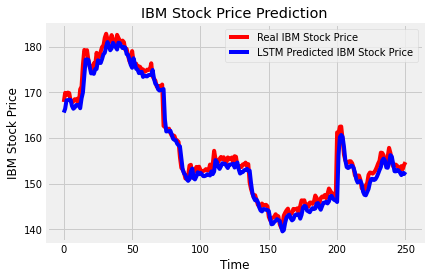

In [ ]:
# Visualizing the results for LSTM
plt.plot(test_set, color='red',label='Real IBM Stock Price')
plt.plot(LSTM_predicted_stock_price, color='blue',label='LSTM Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [ ]:
# Evaluating our model
return_rmse(test_set,LSTM_predicted_stock_price)
print('The root mean squared error is', return_rmse(test_set,LSTM_predicted_stock_price))

The root mean squared error is 1.9785885060504704.


In [ ]:
print('r2 score:',r2_score(test_set,LSTM_predicted_stock_price))

r2 score: 0.9735300069685646


## Gated Recurrent Units (GRU)

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
19/19 [==============================] - 8s 63ms/step - loss: 0.1446
Epoch 2/50
19/19 [==============================] - 1s 64ms/step - loss: 0.0525
Epoch 3/50
19/19 [==============================] - 1s 63ms/step - loss: 0.0193
Epoch 4/50
19/19 [==============================] - 1s 63ms/step - loss: 0.0048
Epoch 5/50
19/19 [==============================] - 1s 63ms/step - loss: 0.0043
Epoch 6/50
19/19 [==============================] - 1s 63ms/step - loss: 0.0040
Epoch 7/50
19/19 [==============================] - 1s 64ms/step - loss: 0.0037
Epoch 8/50
19/19 [==============================] - 1s 63ms/step - loss: 0.0036
Epoch 9/50
19/19 [==============================] - 1s 63ms/step - loss: 0.0035
Epoch 10/50
19/19 [==============================] - 1s 62ms/step - loss: 0.0033
Epoch 11/50
19/19 [==============================] - 1s 62ms/step - loss: 0.0033
Epoch 12/50
19/19 [==============================] - 1s 64ms/step - loss: 0.0033
Epoch 13/50
19/19 [==================

The current version version uses a dense GRU network with 100 units as opposed to the GRU network with 50 units in previous version

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

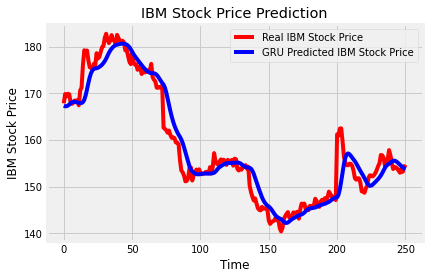

In [ ]:
# Visualizing the results for GRU
plt.plot(test_set, color='red',label='Real IBM Stock Price')
plt.plot(GRU_predicted_stock_price, color='blue',label='GRU Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [ ]:
# Evaluating GRU
print('The root mean squared error is', return_rmse(test_set,GRU_predicted_stock_price))

The root mean squared error is 3.1665148082547265


In [ ]:
print('r2 score:',r2_score(test_set,GRU_predicted_stock_price))

r2 score: 0.9322037129303692


## Visualizing the results

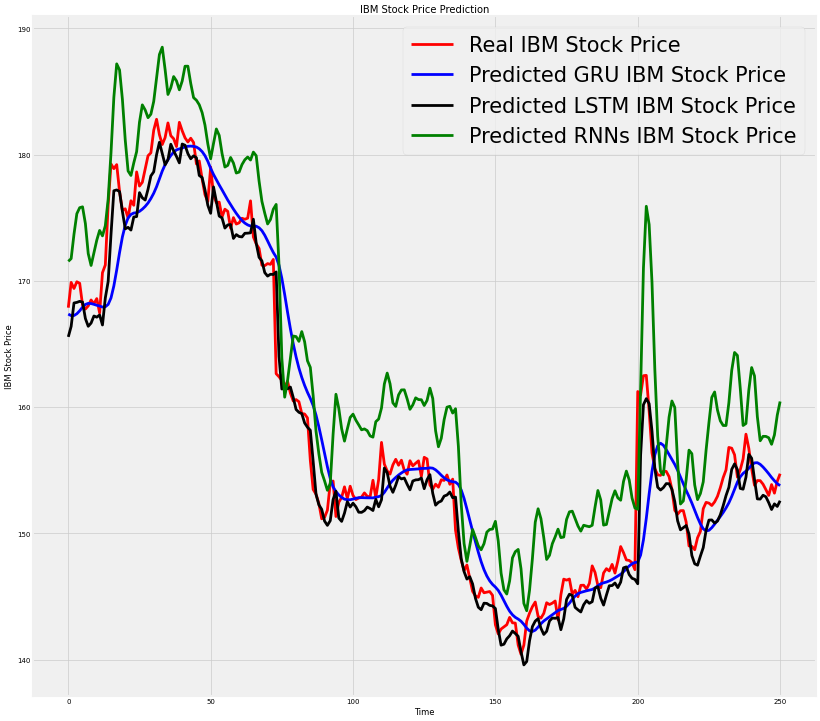

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(18, 18), dpi=50)

plt.plot(test_set, color='red',label='Real IBM Stock Price')
plt.plot(GRU_predicted_stock_price, color='blue',label='Predicted GRU IBM Stock Price')
plt.plot(LSTM_predicted_stock_price, color='black',label='Predicted LSTM IBM Stock Price')
plt.plot(SimpleRNN_predicted_stock_price, color='green',label='Predicted RNNs IBM Stock Price')

plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend(prop = {"size":30})
plt.show()

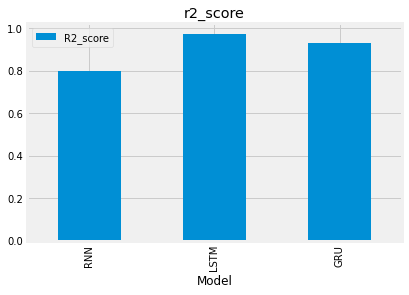

In [ ]:
df = pd.DataFrame({
    'Model': ['RNN', 'LSTM', 'GRU'],
    'R2_score': [r2_score(test_set,SimpleRNN_predicted_stock_price), r2_score(test_set,LSTM_predicted_stock_price), r2_score(test_set,GRU_predicted_stock_price)],
    'mse':[return_rmse(test_set,SimpleRNN_predicted_stock_price),return_rmse(test_set,LSTM_predicted_stock_price),return_rmse(test_set,GRU_predicted_stock_price)]

})
  
# plotting a bar graph
df.plot(x="Model", y=["R2_score"], kind="bar", title='r2_score')


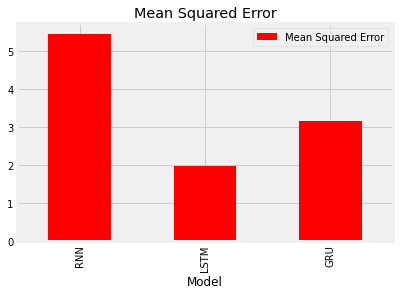

In [ ]:
df.plot(x='Model', y = 'mse', kind = 'bar', color='red',title='Mean Squared Error', label='Mean Squared Error')

## Comment
In this case,

- Using LSTM gives better results (mean squared error is smaller) in this dataset but training time is longer than GRU
- Using GRU has faster training time, but the results are not as good as LSTM
- RNNs is the slowest in training and has the worst result.
